In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

2023-12-21 15:18:46.894733: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-21 15:18:47.029547: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 15:18:47.029668: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 15:18:47.032854: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 15:18:47.052287: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-21 15:18:47.053149: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
#load dataset
df = pd.read_csv("UTS1/berita_HOAX_indonesia.csv")
df[['kategori', 'berita']].head()

,kategori,berita
0,valid,"""Gunung Agung erupsi untuk pertama kali pada 2..."
1,valid,"""Jakarta, CNN Indonesia -- Menteri BUMN Erick ..."
2,valid,"""Dosen Fakultas Kedokteran Hewan IPB, Yusuf Ri..."
3,valid,"""Jakarta - Dua anggota TNI, Serda N dan Serda ..."
4,valid,"""Akui Tembak Jatuh Pesawat Ukraina, Iran Tuai ..."


In [3]:
# Mengambil nilai dari kolom 'berita' dan menyimpannya dalam variabel text_data
text_data = df['berita'].values

# Mengambil nilai dari kolom 'kategori' dan menyimpannya dalam variabel labels
labels = df['kategori'].values

In [4]:
# Inisialisasi objek Tokenizer
tokenizer = Tokenizer()

# Fit Tokenizer pada data teks untuk menghasilkan indeks kata
tokenizer.fit_on_texts(text_data)

# Menghitung ukuran kosakata (vocab_size) berdasarkan indeks kata yang dihasilkan oleh Tokenizer
vocab_size = len(tokenizer.word_index) + 1

In [5]:
# Mengonversi teks ke dalam urutan indeks kata (sequences)
sequences = tokenizer.texts_to_sequences(text_data)

In [6]:
# Panjang maksimum yang diinginkan untuk urutan indeks kata
max_length = 100

# Melakukan padding pada urutan indeks kata
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [7]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi label kategori menjadi bentuk numerik
encoded_labels = label_encoder.fit_transform(labels)

In [8]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=40)

In [9]:
# Menentukan Dimensi embedding
embedding_dim = 50

# Membuat objek model Sequential
model = Sequential()

# Menambahkan lapisan embedding
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))

# Menambahkan lapisan LSTM dengan 100 unit
model.add(LSTM(units=100))

# Menambahkan lapisan Dense dengan 1 unit dan fungsi aktivasi sigmoid
model.add(Dense(units=1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Melatih model dengan data pelatihan dan memonitor kinerja pada data pengujian
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
13/13 [==============================] - 10s 324ms/step - loss: 0.6890 - accuracy: 0.5300 - val_loss: 0.6778 - val_accuracy: 0.6500
Epoch 2/10
13/13 [==============================] - 2s 191ms/step - loss: 0.6751 - accuracy: 0.5925 - val_loss: 0.6559 - val_accuracy: 0.6400
Epoch 3/10
13/13 [==============================] - 3s 206ms/step - loss: 0.6207 - accuracy: 0.6175 - val_loss: 0.6147 - val_accuracy: 0.6500
Epoch 4/10
13/13 [==============================] - 3s 214ms/step - loss: 0.4973 - accuracy: 0.7325 - val_loss: 0.5873 - val_accuracy: 0.7000
Epoch 5/10
13/13 [==============================] - 3s 217ms/step - loss: 0.4664 - accuracy: 0.8150 - val_loss: 1.7403 - val_accuracy: 0.7600
Epoch 6/10
13/13 [==============================] - 2s 182ms/step - loss: 0.8524 - accuracy: 0.8425 - val_loss: 0.8971 - val_accuracy: 0.6600
Epoch 7/10
13/13 [==============================] - 2s 166ms/step - loss: 0.4677 - accuracy: 0.8225 - val_loss: 0.5918 - val_accuracy: 0.6600
Epoch

In [12]:
# Evaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(X_test, y_test)

# Mencetak akurasi pengujian
print(f'Test Accuracy: {test_acc}')

4/4 [==============================] - 0s 63ms/step - loss: 0.5865 - accuracy: 0.6900
Test Accuracy: 0.6899999976158142


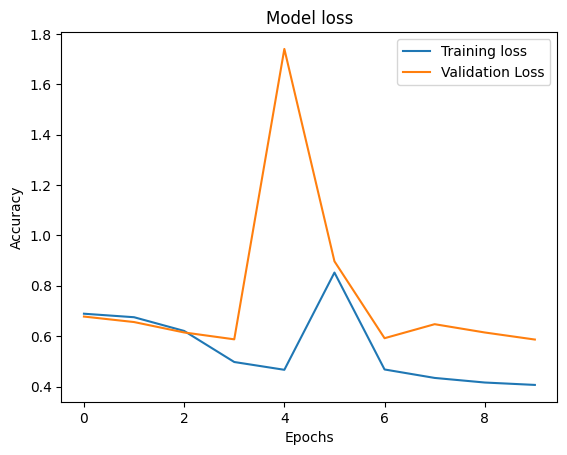

In [13]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

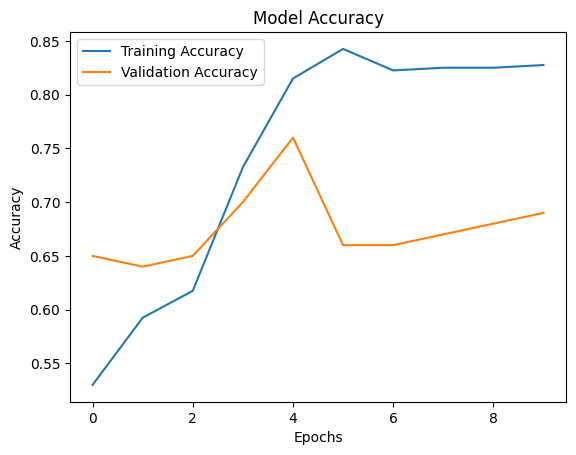

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()